In [1]:

import pandas as pd
df=pd.read_csv('Cleaned_Students_Performance.csv')



FileNotFoundError: [Errno 2] No such file or directory: 'Cleaned_Students_Performance.csv'

Jakie kolumny mają nazwy?

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

Ten zbiór danych zawiera:

- Płeć (Gender): Przydatna do analizy różnic w wynikach między uczniami płci męskiej i żeńskiej.
- Rasa/Etniczność (Race/Ethnicity): Umożliwia analizę trendów w osiągnięciach akademickich w różnych grupach rasowych lub etnicznych.
- Poziom wykształcenia rodziców (Parental Level of Education): Wskazuje na poziom edukacyjny rodziny ucznia.
- Obiad (Lunch): Pokazuje, czy uczniowie otrzymują darmowe lub obniżone obiady, co często jest wskaźnikiem statusu społeczno-ekonomicznego.
- Kurs przygotowawczy do testów (Test Preparation Course): Informuje, czy uczniowie ukończyli kurs przygotowawczy, który może wpłynąć na ich wyniki.
- Wynik z matematyki (Math Score): Mierzy osiągnięcia ucznia w matematyce, co umożliwia obliczanie średnich lub analizowanie trendów w różnych grupach demograficznych.
- Wynik z czytania (Reading Score): Ocena wyników w czytaniu, pozwalająca na wnioski dotyczące poziomu umiejętności czytania i rozumienia tekstu wśród uczniów.
- Wynik z pisania (Writing Score): Ocena umiejętności pisania uczniów, co można analizować w celu oceny ogólnej umiejętności piśmienniczej i wyrażania się.

Zbiór zawiera 1000 rekordów z danymi dot. studentów oraz ich konkretnych umiejętności 

<bound method NDFrame.head of      gender race_ethnicity parental_level_of_education  lunch  \
0         0        group B           bachelor's degree      1   
1         0        group C                some college      1   
2         0        group B             master's degree      1   
3         1        group A          associate's degree      0   
4         1        group C                some college      1   
..      ...            ...                         ...    ...   
995       0        group E             master's degree      1   
996       1        group C                 high school      0   
997       0        group C                 high school      0   
998       0        group D                some college      1   
999       0        group D                some college      0   

     test_preparation_course  math_score  reading_score  writing_score  \
0                          0          72             72             74   
1                          1          69 

Czy zbiór jest zbilansowany?

Kolumna gender odpowiada za płeć, gdzie 1- mężczyzna, 0- kobieta.

gender
0    518
1    482
Name: count, dtype: int64

Sprawdźmy liczności oraz jakie pozycje są wymienione w kolumnie Rasa- race_ethinicity.
5 grup, od A do E

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

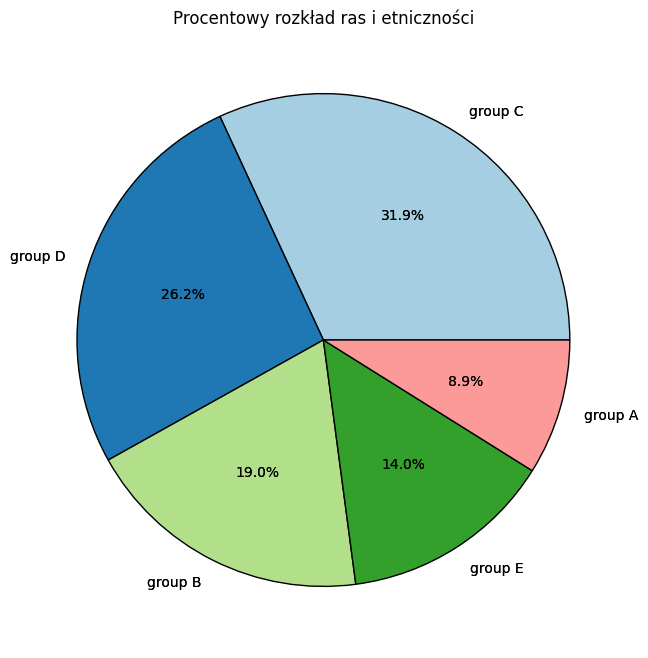

Poziom wykształcenia rodziców Parental Level of education

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Co oznaczają te dane?
some college : Rodzic rozpoczął studia, ale ich nie ukończył .
associate's degree : Rodzic uzyskał stopień "associate" (odpowiednik dwuletnich studiów zawodowych).Pod względem poziomu wykształcenia stopień ten plasuje się pomiędzy świadectwem ukończenia szkoły średniej (high school diploma) a tytułem licencjata (bachelor's degree).
high school : Rodzic ukończył szkołę średnią .
some high school : Rodzic rozpoczął szkołę średnią, ale jej nie ukończył.
bachelor's degree : Rodzic uzyskał tytuł licencjata .
master's degree : Rodzic uzyskał tytuł magistra .

Spróbujmy narysować zwykły wykres słupkowy boxplot, obrazujący

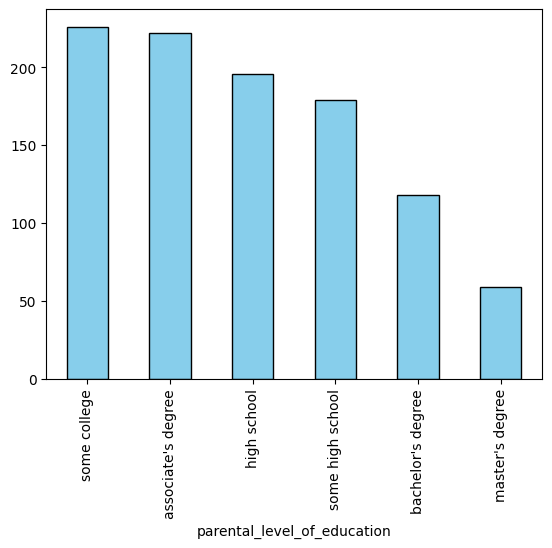

Kolejną zmienną w ramce danych jaką rozważymy będzie Obiad (Lunch): Pokazuje, czy uczniowie otrzymują darmowe lub obniżone (kosztowo) obiady, co często jest wskaźnikiem statusu społeczno-ekonomicznego.
- 1- jesli taka sytuacja występuje
- 0- jeżeli nie występuje.

Rozważmy to w zależności od grupy etnicznej

race_ethnicity  group A  group B  group C  group D  group E
lunch                                                      
0                    36       69      114       95       41
1                    53      121      205      167       99


 Przeprowadźmy test niezależnośći w grupach chi-kwadrat
![Opis zdjęcia](chi-kwadrat.png)

Chi-squared: 3.4423502326273185, P-value: 0.48669808284196503


Chi-squared (3.44) sugeruje, że różnice między obserwowanymi a oczekiwanymi wartościami nie są duże.
P-value (0.487) jest większa niż 0.05, więc nie możemy odrzucić hipotezy zerowej. Oznacza to, że nie ma statystycznych dowodów na zależność między analizowanymi zmiennymi. Wnioskujemy, że zmienne są prawdopodobnie niezależne

Sprawdźmy jaka część stundetów brała udział w testach przygotowawczych do egzaminów

Mówi o tym zmienna Test Preparation Course:
- 1- jeżeli brali udział w tego typu zajęciach
- 0- gdy w tych zajęciach nie uczestniczyli.

0      0
1      1
2      0
3      0
4      0
      ..
995    1
996    0
997    1
998    1
999    0
Name: test_preparation_course, Length: 1000, dtype: int64

Sam udział w testach przygotowawczych o niczym nam nie mówi, ale wyniki poszczególnych egzaminów już tak

Na początek narysujmy prosty wykres punktowy przygotowania do testu a wyników jednego z egzaminu- np. Matematyki


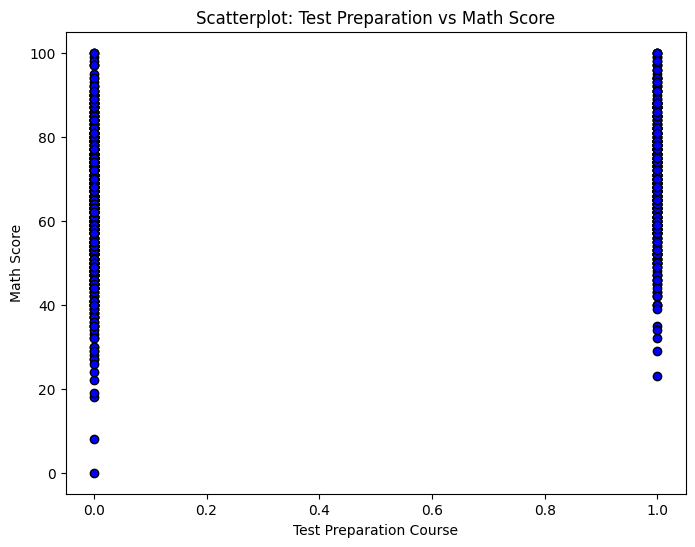

Jak widać- nie bardzo cokolwiek widać, więć warto rozważyć inny typu wykresu.

Propozycja- wykres gęstości, histogram , badź wykresy pudełkowe dla każdej z grup

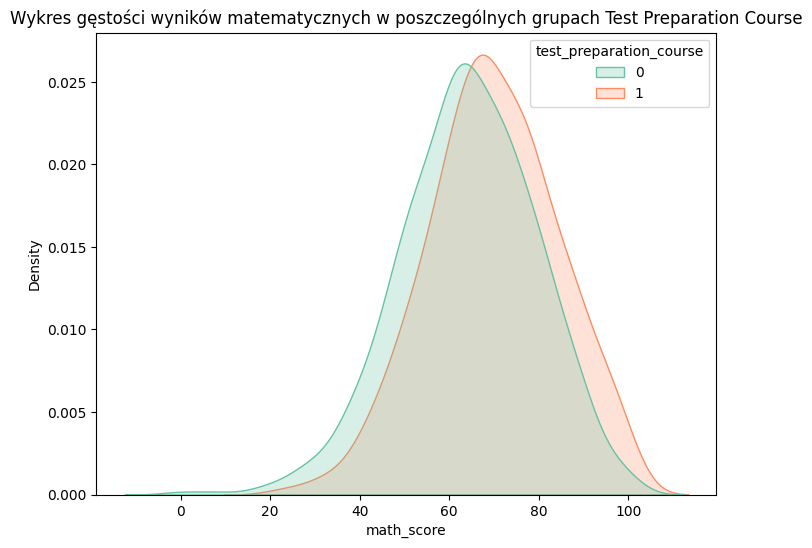

C:\Users\giemzaa\AppData\Local\Temp\ipykernel_5936\1989766930.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test_preparation_course', y='math_score', data=df, palette='Set2')


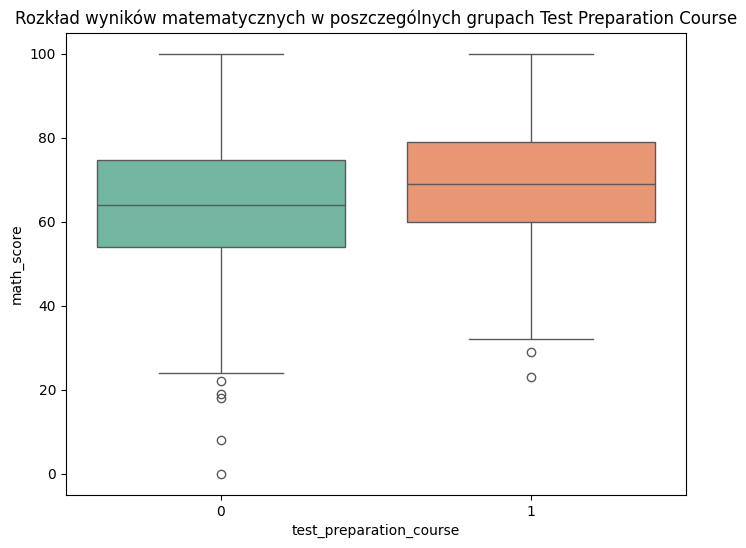

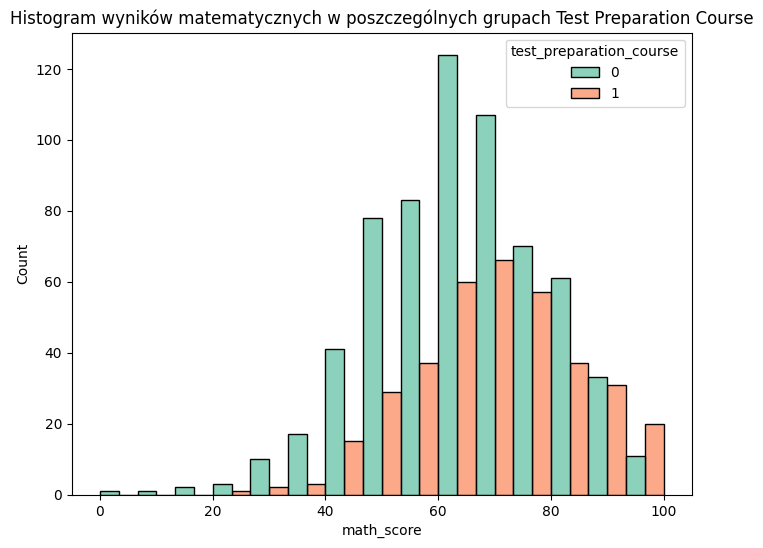

Pytanie - Który wykres najlepiej pokazuje, czy udział w kursie przygotowującym  miał wpływ na wyniki testu z matematyki?

Zadanie- sprawdźmy inne testy
- Reading Score
- Writing Sore
- Łączne wyniki testu
- Średni wynik
  

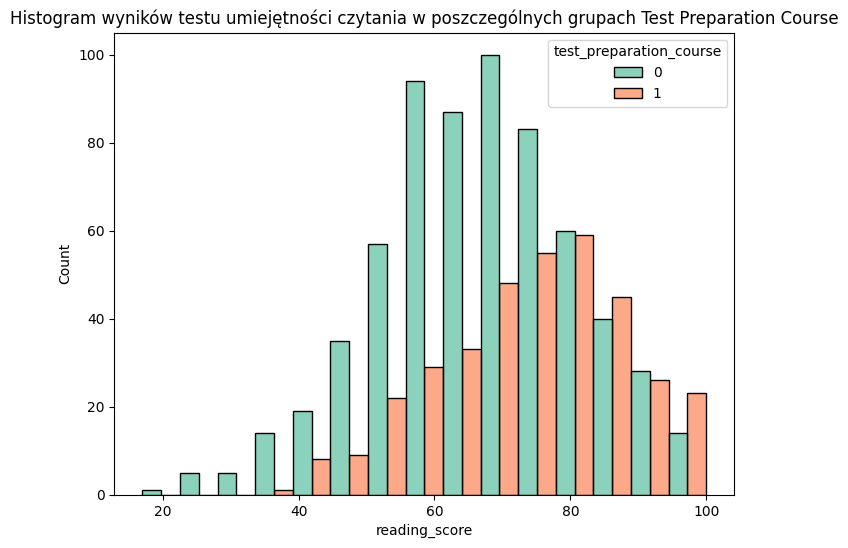

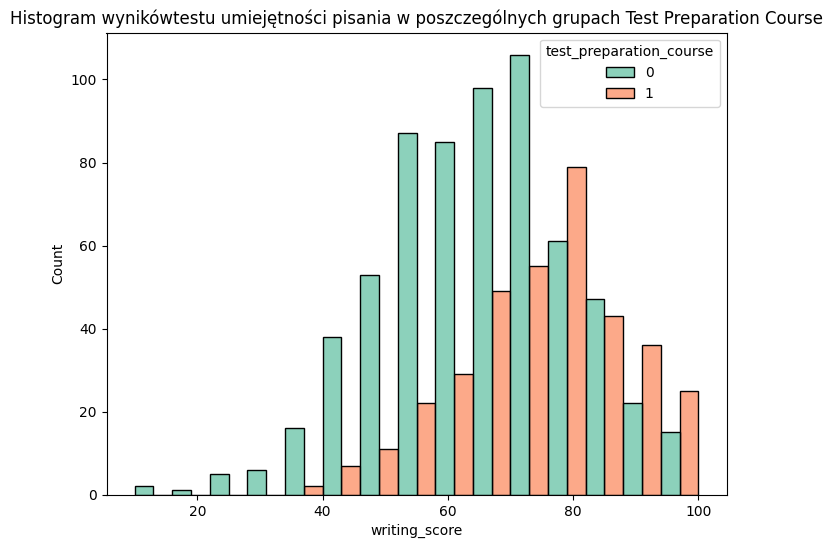

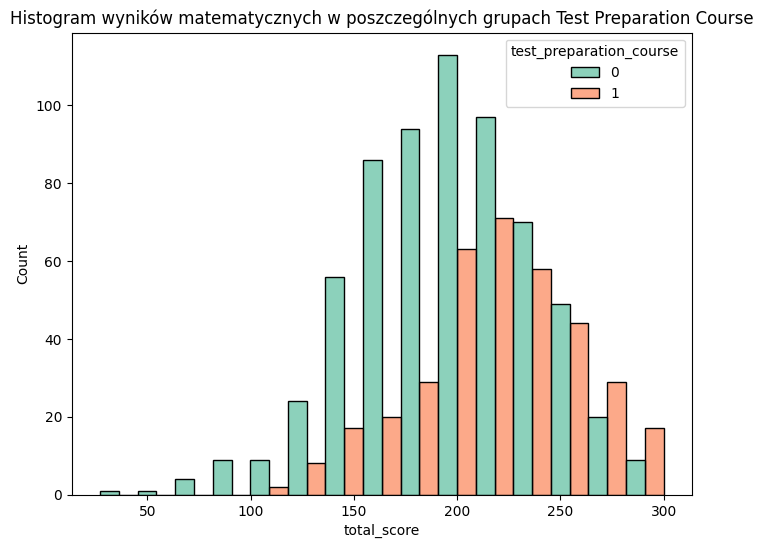

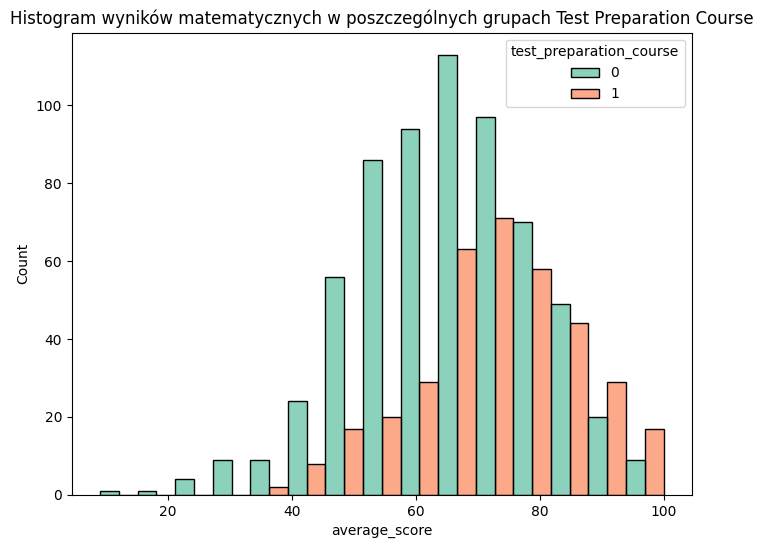

Chi-squared: 237.3069873983569, P-value: 0.016344050879986458


Interpretacja
Wartość p wynosząca...

Można policzyć jeszcze korelację między zmiennymi. Jednak zanim to zrobimy sprawdźmy czy zmienne mają rozkład normalny

Statystyka testu: 0.9931513872437832
Wartość p: 0.00014545719606603633


Jeśli nie ma rozkładu normalnego, to korzystamy z korelacji Spearmana

In [ ]:
import pandas as pd
from scipy.stats import spearmanr




Korelacja Speamana: 0.16980123136105515
Wartość p: 6.584841604904697e-08


Interpretacja: 
Korelacja Spearmana wynosi .. co wskazuje na

Wartość p wynosi..  co wskazuje na